Naive Bayes
              precision    recall  f1-score   support

           0       1.00      0.95      0.98       739
           1       0.89      1.00      0.94       296

    accuracy                           0.97      1035
   macro avg       0.95      0.98      0.96      1035
weighted avg       0.97      0.97      0.97      1035

Logistic Regression
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       739
           1       0.99      0.99      0.99       296

    accuracy                           0.99      1035
   macro avg       0.99      0.99      0.99      1035
weighted avg       0.99      0.99      0.99      1035

SVM
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       739
           1       1.00      0.99      0.99       296

    accuracy                           1.00      1035
   macro avg       1.00      0.99      0.99      1035
weighted avg       1.00      1.00     

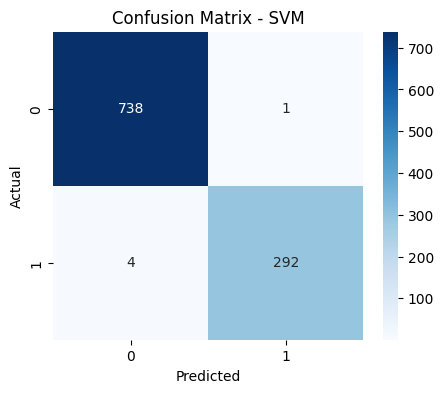

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("/content/emails.csv")


y = df["Prediction"]

numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns
X = df[numeric_cols]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

nb = MultinomialNB()
nb.fit(X_train, y_train)

lr = LogisticRegression(max_iter=500)
lr.fit(X_train, y_train)

svm = LinearSVC()
svm.fit(X_train, y_train)

pred_nb = nb.predict(X_test)
pred_lr = lr.predict(X_test)
pred_svm = svm.predict(X_test)

print("Naive Bayes")
print(classification_report(y_test, pred_nb))

print("Logistic Regression")
print(classification_report(y_test, pred_lr))

print("SVM")
print(classification_report(y_test, pred_svm))

cm = confusion_matrix(y_test, pred_svm)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - SVM")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
